In [8]:
%matplotlib notebook
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [25]:
# load all the weights
m = load_model('./m_cvd_epoch_2_90_0_fc1.h5')

/home/divyas/.local/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [26]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 256, 1)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
fc_1 (Dense)                 (None, 2)                 514       
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [27]:
weights = m.layers[2].get_weights()[0]
offsets = m.layers[2].get_weights()[1]

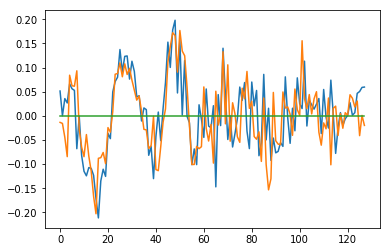

In [32]:
plt.plot(weights[:,0][:128])
plt.plot(weights[:,0][128:])
plt.plot(np.zeros((128,1)))

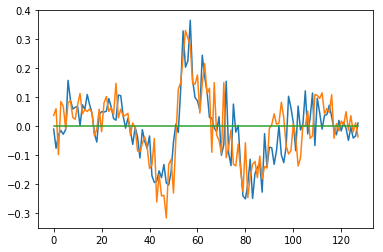

In [33]:
plt.plot(weights[:,1][:128])
plt.plot(weights[:,1][128:])
plt.plot(np.zeros((128,1)))

In [13]:
def get_all_fc2_weights(y_mode, prefix="weight_evolution"):
    row_zeros = []
    row_ones = []
    n_epochs = 20
    for i in range(n_epochs):
        i_str = str(int(i))
        m_name = "./" + prefix + "/m_" + y_mode + "_epoch_" + i_str + "_90_0_fc2.h5"
        m = load_model(m_name)
        m_layer = m.layers[2].get_weights()[0]
        row_zeros.append(m_layer[:,0])
        row_ones.append(m_layer[:,1])
    return np.array(row_zeros), np.array(row_ones)

def pltsin(row, ax, colors=['b']):
    x = np.arange(len(row))
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(row)
    else:
        for color in colors:
            y = row
            ax.plot(x, y, color)
    fig.canvas.draw()
        

In [10]:
mi_r_zeros, mi_r_ones = get_all_fc2_weights("mi")
cvd_r_zeros, cvd_r_ones = get_all_fc2_weights("cvd")

<IPython.core.display.Javascript object>


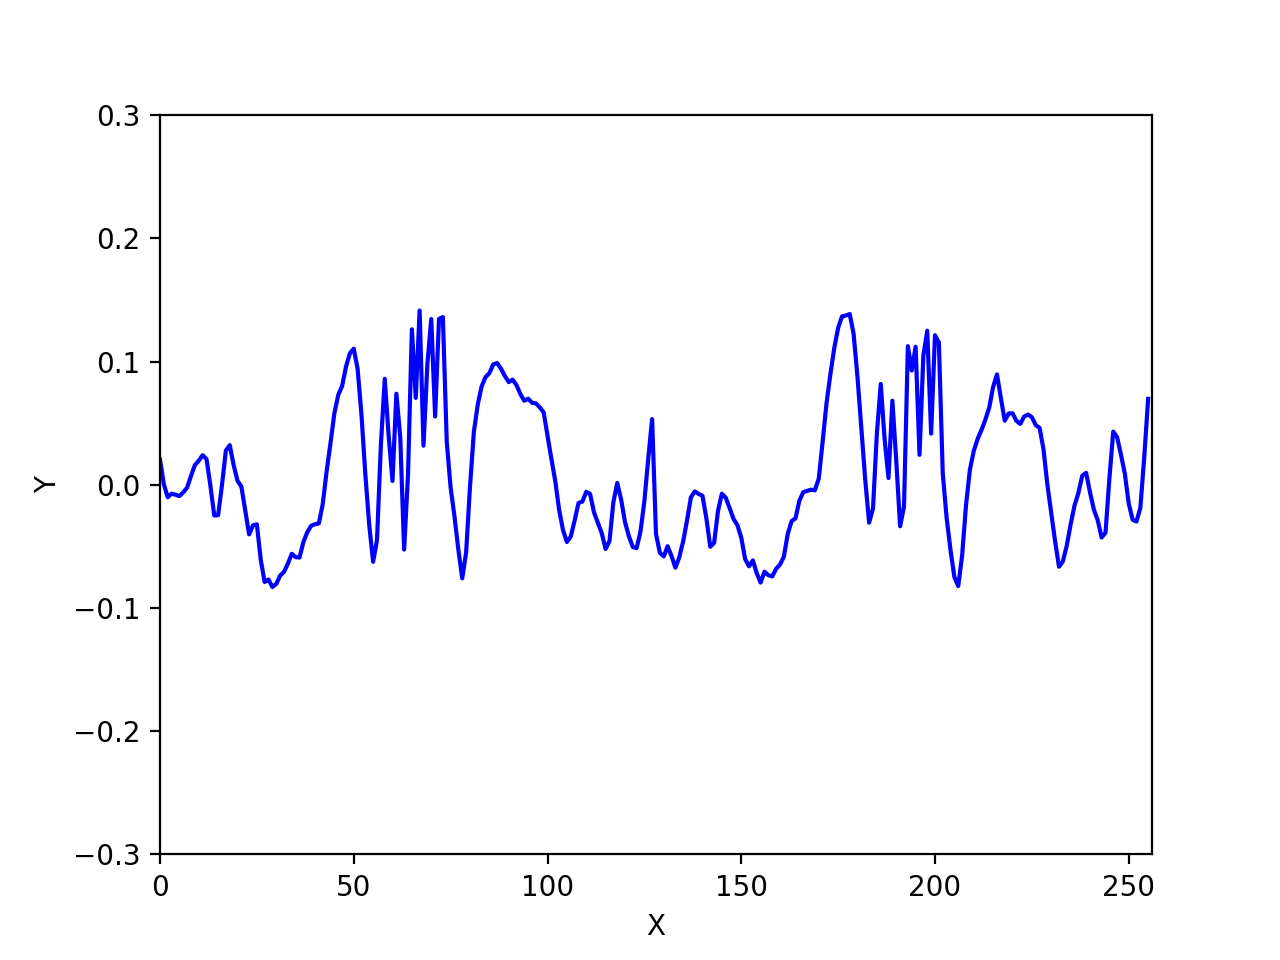

In [19]:
r_zeros = mi_r_zeros
r_ones = mi_r_ones
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,256)
ax.set_ylim(-.3,.3)
for row in r_zeros:
    pltsin(row, ax)
    time.sleep(.5)

<IPython.core.display.Javascript object>


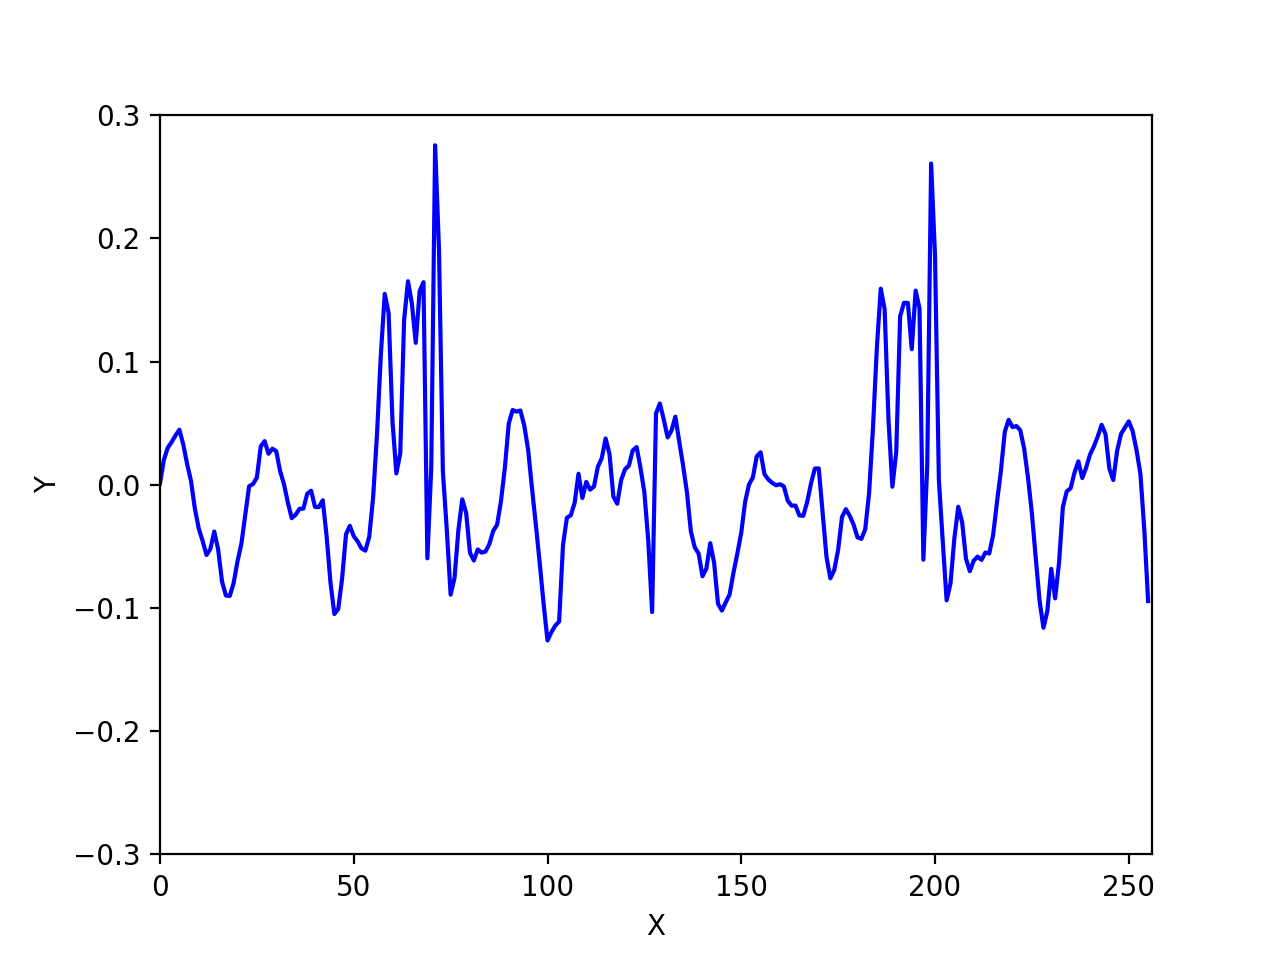

In [21]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,256)
ax.set_ylim(-.3,.3)
for row in r_ones:
    pltsin(row, ax)
    time.sleep(.5)

In [14]:
dtw_mi_r_zeros, dtw_mi_r_ones = get_all_fc2_weights("mi", "dtw_prior")
dtw_cvd_r_zeros, dtw_cvd_r_ones = get_all_fc2_weights("cvd", "dtw_prior")

OSError: Unable to open file (unable to open file: name = './dtw_prior/m_mi_epoch_0_90_0_fc2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)